## Подключаем необходимые библиотеки

Matplotlib модуль pyplot - библиотека для визуализации данных.

Numpy - библиотека для математических вычислений.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Зададим коэффициенты истинного уравнения $y(x) = kx+b$

In [13]:
k = 2.5432
b = 2.43

Зададим участок $[0, 100]$ и разобьем его на 100 частей. Это будет наш набор фичей(X)

Для получения Y применим линейное уравнение с добавлением нормального шума

In [32]:
X = np.linspace(0, 100, 100)
Y = k * X + b + np.random.normal(size=X.size, scale=25)
Y_true = k * X + b

Давайте визуализируем то, что мы получили

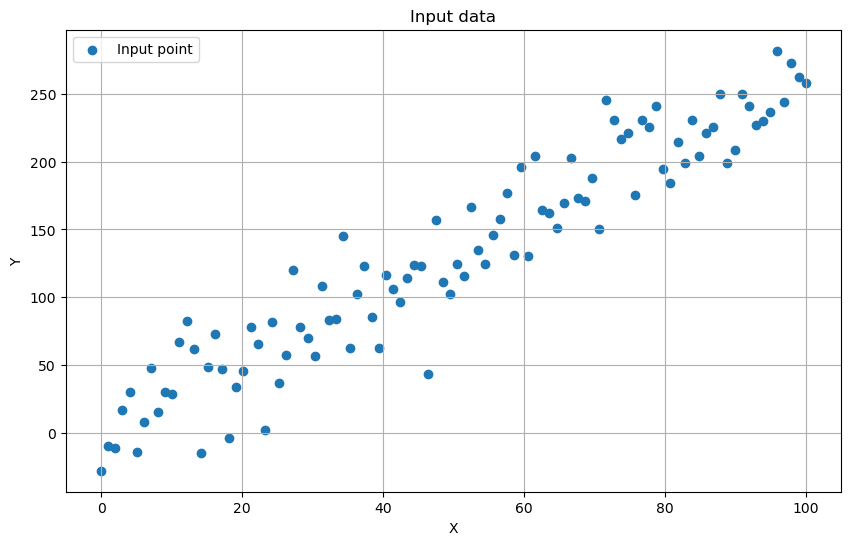

In [33]:
_ = plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Input point")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Input data")
plt.legend()
plt.savefig("Regression_input_data.png", dpi=300)

## Обучение модели регрессии

Импортируем нужный класс модели из библиотеки sklearn.

In [34]:
from sklearn.linear_model import LinearRegression
m = LinearRegression(fit_intercept=True)

Обучим модель на наборе данных

In [35]:
m.fit(X.reshape(-1, 1), Y)

LinearRegression()

Посмотрим на полученные в ходе оптимизации коэффициенты

In [36]:
print("Optimized coeffs:", m.coef_)
print("Optimized intercept:", m.intercept_)

Optimized coeffs: [2.64169072]
Optimized intercept: -0.9679334486205846


Визуализируем результат

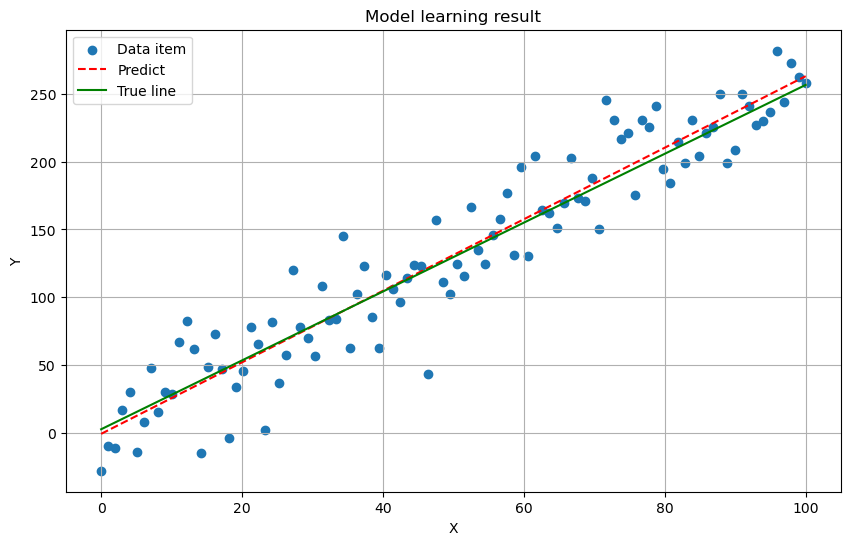

In [41]:
Y_pred = m.predict(X.reshape(-1, 1))

_ = plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Data item")
plt.plot(X, Y_pred, label="Predict", linestyle='--', color='red')
plt.plot(X, Y_true, label="True line", color='green')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Model learning result")
plt.legend()
plt.grid()
plt.savefig("LinearRegression_model_result.png", dpi=300)

### Оценим качество модели

In [42]:
from sklearn.metrics import r2_score

In [48]:
print("R^2 score:", r2_score(Y_pred, Y))

R^2 score: 0.8920175879520137
